In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../scripts/')
import robustness_test
import h5py
import matplotlib.pyplot as plt

In [2]:
model_paths = ['../tutorial_outputs/']
testset_path = '../data/tfr_datasets/i_3072_w_1/'


In [3]:
robustness_test.get_robustness_values(model_paths, testset_path,intermediate = True)

2022-03-18 17:05:46.332766: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-18 17:05:46.838599: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14257 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:c2:00.0, compute capability: 8.6


2022-03-18 17:05:48.348977: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2022-03-18 17:05:49.750648: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [4]:
output_file = h5py.File('./robustness_test_output/tutorial_outputs/variance_of_preds.h5', 'r')


In [5]:
output_file.keys()

<KeysViewHDF5 ['center_ground_truth_1K', 'center_pred', 'prediction_variance', 'robust_pred']>

Text(0.5, 1.0, 'robustness score = 0.004242537077516317')

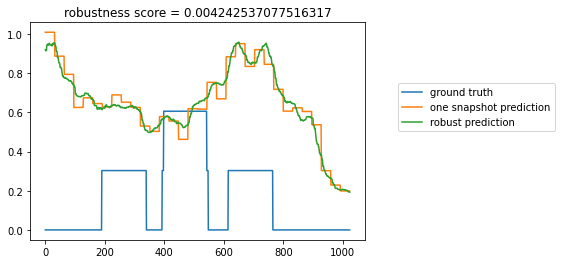

In [6]:
i = 3000
plt.plot(output_file['center_ground_truth_1K'][i,:,0], label='ground truth')
plt.plot(output_file['center_pred'][i,:,0], label='one snapshot prediction')
plt.plot(output_file['robust_pred'][i,:,0], label='robust prediction')
plt.legend(loc=(1.1,0.5))
plt.title('robustness score = {}'.format(output_file['prediction_variance'][i,0]))